# Usage Examples for the Bayez Package

In [1]:
%pylab inline

Populating the interactive namespace from numpy and matplotlib


In [2]:
import bayez
print bayez.__version__

0.1.dev210


## Template Samplers

Create samplers for each spectroscopic class:

In [3]:
qso_sampler = bayez.sampler.QSOSampler()

INFO:io.py:466:read_basis_templates: Reading /Data/DESI/basis_templates/v1.1/qso_templates_v1.1.fits


INFO:DESI:Reading /Data/DESI/basis_templates/v1.1/qso_templates_v1.1.fits


In [4]:
lrg_sampler = bayez.sampler.LRGSampler()

INFO:io.py:466:read_basis_templates: Reading /Data/DESI/basis_templates/v1.1/lrg_templates_v1.2.fits


INFO:DESI:Reading /Data/DESI/basis_templates/v1.1/lrg_templates_v1.2.fits


Loaded 144 templates.
144 templates pass the color cuts.
trimming from 47378 to 27372 wavelength bins.
Using stellar velocity dispersions: [ 148.540487    176.83162941  199.5262315   225.13346277  268.01256586] km/s


In [5]:
elg_sampler = bayez.sampler.ELGSampler()

INFO:io.py:466:read_basis_templates: Reading /Data/DESI/basis_templates/v1.1/elg_templates_v1.5.fits


INFO:DESI:Reading /Data/DESI/basis_templates/v1.1/elg_templates_v1.5.fits


Loaded 7876 templates.
trimming from 18428 to 10642 wavelength bins.
5150 templates pass color-color cuts.
7876 templates pass OII flux cut.
5150 templates pass all cuts.


Plot some example spectra generated by each sampler:

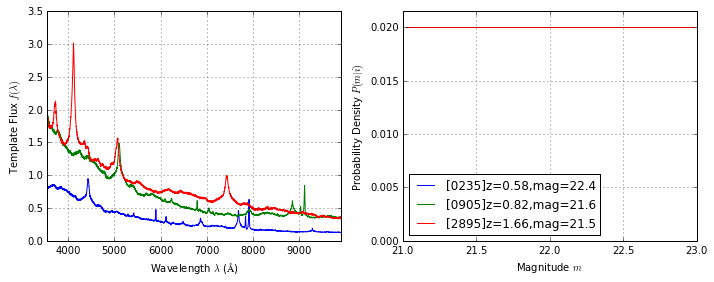

In [6]:
qso_sampler.plot_samples(num_samples=3, seed=1)

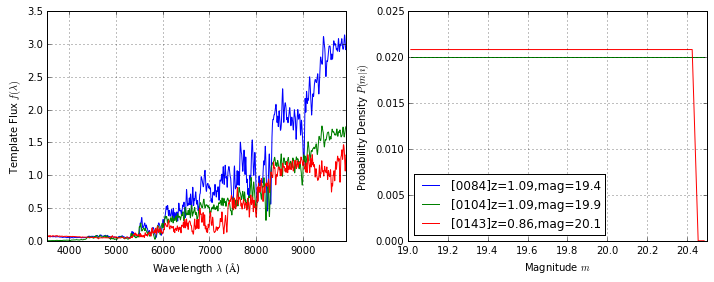

In [7]:
lrg_sampler.plot_samples(num_samples=3, seed=8)

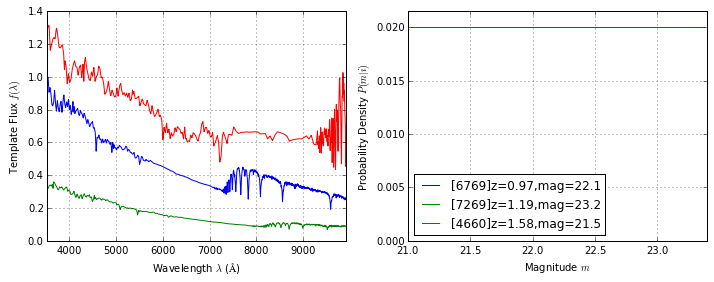

In [8]:
elg_sampler.plot_samples(num_samples=3, seed=1)

## Instrument Simulation

Define a simulator that downsamples to 4A pixels:

In [9]:
simulator4 = bayez.simulation.Simulator(analysis_downsampling=4)

Simulation wavelength grid:  [ 3533.   3533.2  3533.4 ...,  9912.6  9912.8  9913. ]
Band b: simulation pixel limits are 180, 12080.
Band b: downsampled aligned pixel limits are 36, 2416.
Band r: simulation pixel limits are 10460, 21040.
Band r: downsampled aligned pixel limits are 2092, 4208.
Band z: simulation pixel limits are 19510, 31505.
Band z: downsampled aligned pixel limits are 3902, 6298.
Total length of analysis pixel vector is 1723.


## Priors

Priors can either be generated from a sampler and simulator, or else loaded from a FITS file:

In [10]:
qso_prior = bayez.prior.build_prior('qso', qso_sampler, simulator4, 100, seed=1)

In [11]:
qso_prior.save('qso_small_prior.fits', clobber=True)

or else loaded from a FITS file:

In [12]:
qso_prior = bayez.prior.load_prior('qso_small_prior.fits')

Plot the data vector associated with any spectrum in a prior:

/Users/david/anaconda/lib/python2.7/site-packages/matplotlib/collections.py:590: FutureWarning: elementwise comparison failed; returning scalar instead, but in the future will perform elementwise comparison
  if self._edgecolors == str('face'):


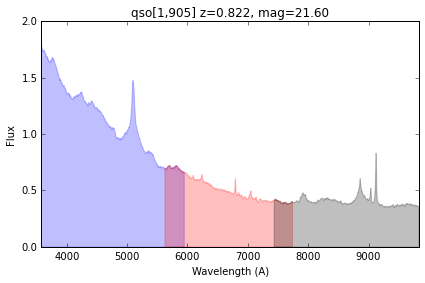

In [13]:
qso_prior.plot(1)

## Estimator

Create a redshift estimator for the QSO spectroscopic class:

In [14]:
qso_prior = bayez.prior.load_prior('/Users/david/Cosmo/DESI/ZFit/qso_prior_4_10k.fits')
qso_estimator = bayez.estimator.RedshiftEstimator(qso_prior)

Run a small batch test of 5 examples:

In [15]:
bayez.estimator.estimate_batch(qso_estimator, 5, qso_sampler, simulator4, seed=1)

i,t_index,mag,z,dz_map,dz_avg
int32,int32,float32,float32,float32,float32
0,6218,22.6949,2.88137,0.0,1.29785e-05
1,1492,22.0248,1.00695,0.0,-2.68224e-08
2,4272,21.8008,2.22142,-0.00291324,-0.000427875
3,7383,22.0051,3.5917,0.0,0.0
4,3197,21.7789,1.7285,0.0,-1.31038e-10


Inspect a single test case by specifying the same seed and index:

Generated [4272] z = 2.2214, mag = 21.80
Elapsed time 1.896s
MAP: z[2673] = 2.2185
<z> = 2.2210


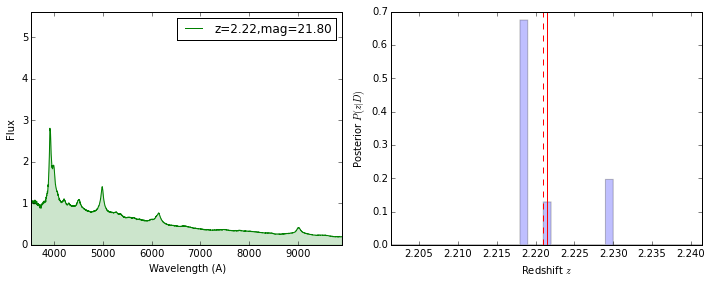

In [16]:
bayez.estimator.estimate_one(qso_estimator, qso_sampler, simulator4, seed=1, i=2)